<a href="https://colab.research.google.com/github/combo99/ai-training/blob/main/Admissions_AI_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# If you want to try this program out specifically on the file, visit the following website and download the csv file:
# https://www.kaggle.com/code/yasirabdaali/analysis-on-university-admission-dataset
# Have Fun!

import pandas as pd

dataset = pd.read_csv('adm_data.csv')

In [4]:
x = dataset.drop(columns=["Chance of Admit ","Serial No."])

In [5]:
y = dataset["Chance of Admit "]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.6)

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.layers.Dense(256, input_shape=x_train.shape[1:], activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [10]:
model.fit(x_train, y_train, epochs=2000)

Epoch 1/2000
5/5 [==============================] - 1s 6ms/step - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 2/2000
5/5 [==============================] - 0s 5ms/step - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 3/2000
5/5 [==============================] - 0s 5ms/step - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 4/2000
5/5 [==============================] - 0s 6ms/step - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 5/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 6/2000
5/5 [==============================] - 0s 5ms/step - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 7/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 8/2000
5/5 [==============================] - 0s 7ms/step - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 9/2000
5/5 [==============================] - 0s 5ms/step - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 10/2000
5/5 [=========

In [11]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.0063 - mean_squared_error: 0.0063


[0.006302590947598219, 0.006302590947598219]

In [12]:
import numpy as np

loss, mse = model.evaluate(x_test, y_test)

rmse = np.sqrt(mse)

print("RMSE:", rmse)

8/8 [==============================] - 0s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063
RMSE: 0.07938885908991399


8/8 [==============================] - 0s 2ms/step


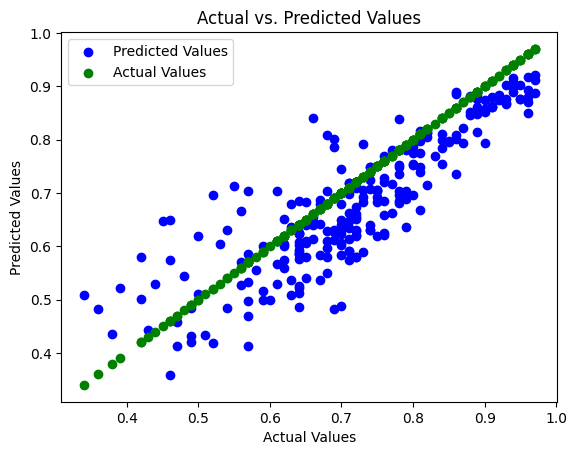

In [13]:
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

plt.scatter(y_test, predictions, c='blue', label='Predicted Values')
plt.scatter(y_test, y_test, c='green', label='Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [14]:
gre_score = float(input("Enter GRE Scores (out of 340): "))
toefl_score = float(input("Enter TOEFL Scores (out of 120): "))
university_rating = int(input("Enter University Rating (out of 5): "))
sop = float(input("Enter Statement of Purpose (SOP) rating (out of 5): "))
lor = float(input("Enter Letter of Recommendation (LOR) strength (out of 5): "))
gpa = float(input("Enter Undergraduate GPA (out of 10): "))
research_exp = int(input("Enter Research Experience (0 or 1): "))

input_data = [[gre_score, toefl_score, university_rating, sop, lor, gpa, research_exp]]

input_data = tf.convert_to_tensor(input_data)

predicted_chance_of_admit = model.predict(input_data)

print("Predicted Chance of Admit:", predicted_chance_of_admit[0][0])

Enter GRE Scores (out of 340): 340
Enter TOEFL Scores (out of 120): 119
Enter University Rating (out of 5): 5
Enter Statement of Purpose (SOP) rating (out of 5): 4.5
Enter Letter of Recommendation (LOR) strength (out of 5): 5
Enter Undergraduate GPA (out of 10): 9.98
Enter Research Experience (0 or 1): 1
1/1 [==============================] - 0s 67ms/step
Predicted Chance of Admit: 0.92014116
